# Exercise 1

Reached 1 keV at time t = 0.1821 s
Position: x = 9928.3004 m, y = 1821.0000 m
Velocity: vx = 108982.4417 m/s, vy = 10000.0000 m/s


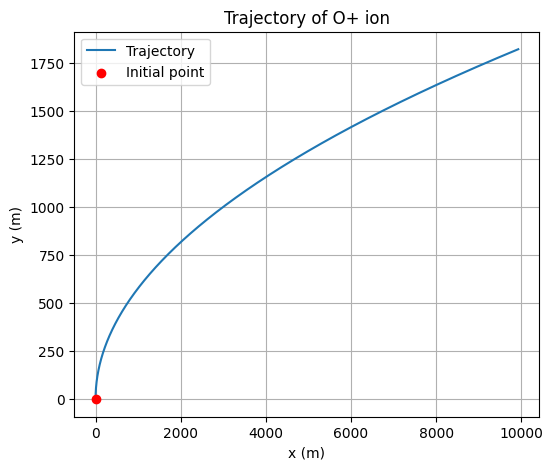

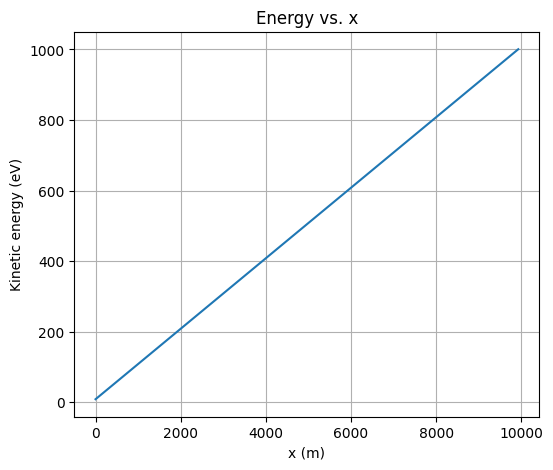

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
e = 1.602e-19  # Elementary charge
mp = 1.673e-27  # Proton mass (kg)
m = 16 * mp  # O+ mass (kg)
q = e  # Charge (C)
Ex = 0.1  # Electric field [V/m]

# Initial conditions
x0, y0 = 0.0, 0.0
vx0, vy0 = 0.0, 1.0e4

dt = 1e-4  # Time step [s]

time = 0.0
trajectory = []
energies = []

E_target = 1000 * e  # Target energy [Joules]

# Initialize position and velocity
x, y = x0, y0
vx, vy = vx0, vy0

# Time loop
while True:
    Ek = 0.5 * m * (vx**2 + vy**2) # Kinetic energy
    trajectory.append((x, y)) # Store trajectory
    energies.append((x, Ek)) # Store energy

    if Ek >= E_target: # Stop if energy exceeds E_target and print results
        print(f"Reached 1 keV at time t = {time:.4f} s")
        print(f"Position: x = {x:.4f} m, y = {y:.4f} m")
        print(f"Velocity: vx = {vx:.4f} m/s, vy = {vy:.4f} m/s")
        break

    # Update velocity
    ax = q * Ex / m
    vx += ax * dt

    # Update position
    x += vx * dt
    y += vy * dt

    # Update time
    time += dt

# Convert results to arrays for plotting
trajectory = np.array(trajectory)
energies = np.array(energies)

# Plot trajectory
plt.figure(figsize=(6,5))
plt.plot(trajectory[:,0], trajectory[:,1], label='Trajectory')
plt.scatter(trajectory[0,0], trajectory[0,1], color='red', label='Initial point', zorder=5)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajectory of O+ ion')
plt.legend()
plt.grid()
plt.show()

# Plot energy vs x
plt.figure(figsize=(6,5))
plt.plot(energies[:,0], energies[:,1]/e)
plt.xlabel('x (m)')
plt.ylabel('Kinetic energy (eV)')
plt.title('Energy vs. x')
plt.grid()
plt.show()

In [3]:
# Analytical calculation of x_max

x_max=(E_target-(1/2)*mp*vy0**2)/(q*Ex)
print(f"x_max analytical = {x_max:.2f} m")

x_max analytical = 9994.78 m


In [4]:
# Analytical calculation of final vx and time to reach 1 keV

v_x_final = np.sqrt(2 * (E_target) / m - vy**2)
t_final = (v_x_final) / (q * Ex / m)
print(f"Analytical final vx: {v_x_final:.4f} m/s, time to reach 1 keV: {t_final:.4f} s")

Analytical final vx: 108947.3076 m/s, time to reach 1 keV: 0.1820 s
